<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Các-thư-viện-sử-dụng" data-toc-modified-id="Các-thư-viện-sử-dụng-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Các thư viện sử dụng</a></span></li><li><span><a href="#Danh-sách-kiểm-tra-phân-tích-dữ-liệu" data-toc-modified-id="Danh-sách-kiểm-tra-phân-tích-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Danh sách kiểm tra phân tích dữ liệu</a></span></li><li><span><a href="#Tiền-xử-lý-dữ-liệu" data-toc-modified-id="Tiền-xử-lý-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tiền xử lý dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Sai-kiểu-dữ-liệu" data-toc-modified-id="Sai-kiểu-dữ-liệu-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sai kiểu dữ liệu</a></span></li><li><span><a href="#Giá-trị-thiếu-(missing-values)" data-toc-modified-id="Giá-trị-thiếu-(missing-values)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Giá trị thiếu (missing values)</a></span></li><li><span><a href="#Xử-lý-dữ-liệu-nhiễu" data-toc-modified-id="Xử-lý-dữ-liệu-nhiễu-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Xử lý dữ liệu nhiễu</a></span></li></ul></li><li><span><a href="#Phân-tích-dữ-liệu" data-toc-modified-id="Phân-tích-dữ-liệu-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Phân tích dữ liệu</a></span><ul class="toc-item"><li><span><a href="#Xu-hướng-nghe-nhạc-qua-từng-năm" data-toc-modified-id="Xu-hướng-nghe-nhạc-qua-từng-năm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Xu hướng nghe nhạc qua từng năm</a></span></li><li><span><a href="#Đất-nước-có-nhiều-nghệ-sĩ-được-xác-minh-(verified)" data-toc-modified-id="Đất-nước-có-nhiều-nghệ-sĩ-được-xác-minh-(verified)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Đất nước có nhiều nghệ sĩ được xác minh (verified)</a></span></li><li><span><a href="#Sự-tương-quan-giữa-nghệ-sĩ-được-xác-minh-(verified)-và-lượt-nghe-các-track-của-họ" data-toc-modified-id="Sự-tương-quan-giữa-nghệ-sĩ-được-xác-minh-(verified)-và-lượt-nghe-các-track-của-họ-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sự tương quan giữa nghệ sĩ được xác minh (verified) và lượt nghe các track của họ</a></span></li></ul></li></ul></div>

## Các thư viện sử dụng

In [1]:
from datetime import datetime
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Tiền xử lý dữ liệu cho câu hỏi 3, 4, 5 bên dưới
*Thay vì tiền xử lý ở mỗi câu hỏi, ở đây ta tiền xử lỷ một lúc cho ba câu hỏi 3, 4, 5. Sự khác biệt này là do phong cách code của các thành viên trong nhóm là khác nhau.*

Với câu hỏi đã đặt ra, chúng ta sẽ chỉ tập trung xử lý:
- Dữ liệu `track`: gồm các trường `genre`, `created_at`, `playback_count` và `user_id`
- Dữ liệu `user`: gồm các trường `id`, `verified` và `country_code`

Đầu tiên, ta tiến hành load dữ liệu từ file `csv` đã chuẩn bị sẵn và lọc ra các trường cần thiết.

In [2]:
# Users
user_df = pd.read_csv('./user.csv')
user_df = user_df[['id', 'verified', 'country_code']].reset_index(drop=True)

# Tracks
track_df = pd.read_csv('./track.csv')
track_df = track_df[['genre', 'created_at', 'playback_count', 'user_id']].reset_index(drop=True)

### Sai kiểu dữ liệu
Để xem xét các trường có sai dữ liệu hay không, chúng ta cần phải coi kiểu dữ liệu hiện tại của các trường đã.

In [3]:
# Users
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12029 non-null  int64 
 1   verified      12029 non-null  bool  
 2   country_code  6554 non-null   object
dtypes: bool(1), int64(1), object(1)
memory usage: 199.8+ KB


In [4]:
# Tracks
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633016 entries, 0 to 633015
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   genre           523931 non-null  object 
 1   created_at      633016 non-null  object 
 2   playback_count  599027 non-null  float64
 3   user_id         633016 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 19.3+ MB


Với kết quả ở trên, ta có nhận xét sau:
- Bảng `user_df`: các trường đều có kiểu dữ liệu như mong đợi.
- Bảng `track_df`: chỉ có trường `created_at` có kiểu dữ liệu `object` khác với mong đợi là `datetime`.

Chúng ta sẽ tiến hành convert kiểu dữ liệu của trường `created_at` sang `datetime`. Trước khi chuyển, chúng ta cần xem xét format của dữ liệu.

In [5]:
track_df['created_at'].head(5)

0    2021-10-29T08:43:42Z
1    2021-10-15T09:37:00Z
2    2021-09-24T08:55:16Z
3    2021-09-17T07:35:14Z
4    2021-09-03T09:40:32Z
Name: created_at, dtype: object

Đây là kiểu dữ liệu ngày giờ theo chuẩn thời gian **ISO 8601**, nên để dễ dàng chuyển đổi, ta sẽ sử dụng thư viện `datetime`.

In [6]:
# Convert từ string sang datetime bằng dateutil.parser
track_df['created_at'] = track_df['created_at'].apply(lambda date: datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z"))

In [7]:
# Kiểm tra lại
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633016 entries, 0 to 633015
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   genre           523931 non-null  object             
 1   created_at      633016 non-null  datetime64[ns, UTC]
 2   playback_count  599027 non-null  float64            
 3   user_id         633016 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 19.3+ MB


### Giá trị thiếu (missing values)
Tiếp theo, chúng ta sẽ tiến hành xử lý dữ liệu thiếu. Đầu tiên, chúng ta sẽ xem xét xem trường nào bị thiếu, thiếu bao nhiêu và chiếm bao nhiêu phần trăm dữ liệu.

In [8]:
# Users
user_mv = pd.DataFrame()
user_mv['Số lượng'] = user_df.isna().sum().values
user_mv['Phần trăm'] = user_mv['Số lượng'].apply(lambda val: val/user_df.shape[0] * 100)
user_mv.index = user_df.columns

user_mv

,Số lượng,Phần trăm
id,0,0.000000
verified,0,0.000000
country_code,5475,45.515005


In [9]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = track_df.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/track_df.shape[0] * 100)
track_mv.index = track_df.columns

track_mv

,Số lượng,Phần trăm
genre,109085,17.232582
created_at,0,0.000000
playback_count,33989,5.369375
user_id,0,0.000000


Tiếp theo, chúng ta sẽ tiến hành phân tích các trường và đưa ra cách giải quyết phù hợp:
- `country_code`: thuộc kiểu categorical $\rightarrow$ ta coi các missing values là *Quốc gia không xác định* và fill in bằng giá trị `unknown`.
- `genre`: thuộc kiểu categorical $\rightarrow$ chỉ chiếm khoảng 17% và chúng ta không thể phân tích gì được với thể loại nhạc không xác định, cho nên với trường này chúng ta sẽ tiên hành drop các missing values.
- `playback_count`: thuộc kiểu numerical $\rightarrow$ tương tự như trường `genre`, chúng ta sẽ drop các missing values.



In [10]:
# Fill giá trị trường country_code
user_df.fillna(value='unknown', inplace=True)

# Drop mv ở trường genre và playback_count
track_df.dropna(inplace=True)

In [11]:
# Kiểm tra lại
# Users
user_mv = pd.DataFrame()
user_mv['Số lượng'] = user_df.isna().sum().values
user_mv['Phần trăm'] = user_mv['Số lượng'].apply(lambda val: val/user_df.shape[0] * 100)
user_mv.index = user_df.columns

user_mv

,Số lượng,Phần trăm
id,0,0.0
verified,0,0.0
country_code,0,0.0


In [12]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = track_df.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/track_df.shape[0] * 100)
track_mv.index = track_df.columns

track_mv

,Số lượng,Phần trăm
genre,0,0.0
created_at,0,0.0
playback_count,0,0.0
user_id,0,0.0


### Xử lý dữ liệu nhiễu
Đầu tiên chúng ta sẽ kiểm tra miền giá trị của các trường:
- `verified`: chỉ gồm 2 giá trị True và False
- `created_at`: Soundcloud ra đời vào *tháng 8 năm 2018* cho nên miền giá trị của trường này phải bắt đầu từ đây.
- `playback_count` và `user_id`: không được là giá trị âm

In [13]:
# Kiểm tra trường verified
user_df.verified.value_counts()

False    8597
True     3432
Name: verified, dtype: int64

In [14]:
# Tracks
track_df.describe(include='all', datetime_is_numeric=True)

,genre,created_at,playback_count,user_id
count,507762,507762,5.077620e+05,5.077620e+05
unique,41729,NaN,NaN,NaN
top,Electronic,NaN,NaN,NaN
freq,42472,NaN,NaN,NaN
mean,NaN,2018-03-16 02:43:55.400540160+00:00,1.381771e+05,1.163146e+08
min,NaN,2008-09-03 20:49:56+00:00,0.000000e+00,1.870000e+02
25%,NaN,2016-03-31 11:03:01+00:00,9.700000e+02,1.819173e+06
50%,NaN,2018-10-04 14:40:15+00:00,5.079000e+03,2.380901e+07
75%,NaN,2020-06-28 22:47:18.750000128+00:00,2.330600e+04,1.573754e+08
max,NaN,2021-11-08 09:01:38+00:00,2.825388e+08,1.043528e+09


Có vẻ như các trường này đều ổn. Tiếp theo là đến hai trường còn lại, đầu tiên ta xem sơ qua các giá trị của 2 trường này.

In [15]:
# Trường genre
track_df.genre.value_counts()

Electronic       42472
Dance & EDM      37444
House            31727
Techno           20481
Hip-hop & Rap    18706
                 ...  
STERAC               1
makcim&levi          1
queenleaf            1
nightmusik           1
myapple daily        1
Name: genre, Length: 41729, dtype: int64

In [16]:
# Trường country_code
user_df[user_df.country_code != 'unknown'].country_code.value_counts()

US    1742
GB     510
DE     387
JP     366
FR     336
      ... 
MZ       1
GT       1
MD       1
AW       1
BM       1
Name: country_code, Length: 139, dtype: int64

Với kết quả ở trên, ta có một số nhận xét:
- `genre`: một số người dùng tự định nghĩa dòng nhạc của bản thân. Do đó, chỉ lấy những dòng nhạc có từ **500** records trở lên.
- `country_code`: code theo chuẩn [ISO 3166-1 Alpha-2](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2), gồm 2 ký tự viết hoa. Do đó, chúng ta sẽ loại những giá trị mà độ dài khác 2 và viết thường.

In [17]:
# Trường genre
## Chọn ra những dòng nhạc chỉ có từ 2 người sử dụng trở lên
genres = track_df.genre.value_counts() >= 500
genres = track_df.genre.value_counts()[genres]
genres = set(genres.index)

## Lọc lại dữ liệu
track_df = track_df[track_df.genre.isin(genres)].reset_index(drop=True)

In [18]:
# Trường country_code
## Chọn ra các code theo chuẩn ISO 3166-1 Alpha-2
country_codes = set(user_df.country_code.value_counts().index)
final_codes = set()
for code in country_codes:
    if re.match('^[A-Z]{2}$', code):
        final_codes.add(code)

len(final_codes)

139

Sau khi lọc lại thì số lượng *unique value* trong `country_code` không thay đổi (bằng **139**)! Do đó, ta sẽ không cần thay đổi bất cứ thứ gì.

Đến đây, dữ liệu của chúng ta đã tương đối *sạch sẽ*. Chúng ta sẽ qua bước kế tiếp: **phân tích dữ liệu**!

## Phân tích dữ liệu
Nhắc lại 3 câu hỏi đã đưa ra:
- Xu hướng nghe nhạc qua từng năm.
- Đất nước nào có nhiều nghệ sĩ được xác minh? 
- Sự tương quan giữa `verified` và `playback_count`

Chúng ta sẽ lần lượt tiến hành phân tích dữ liệu để giải quyết từng câu hỏi
# 3. Xu hướng nghe nhạc qua từng năm
- Bảng dữ liệu cần sử dụng: `track`
- Các trường cần sử dụng: `genre`, `created_at`
- Kiểu dữ liệu mong đợi của các trường được sử dụng:
    - `genre`: *string*
    - `created_at`: *datetime*
- Các vấn đề có thể xảy ra: `genre` chứa missing values do có thể người dùng không nhập và một số người dùng tự định nghĩa `genre` của bản thân.
- Hướng giải quyết: sử dụng **Line chart** để trực quan hóa sự thay đổi của dòng nhạc và số lượng track tương ứng qua từng năm.
- Dự đoán kết quả: EDM chắc sẽ là cái tên phổ biến ở các năm gần đây, xa hơn nữa có thể là R&B hay Rock.

Để giải quyết câu hỏi này, ta sẽ sử dụng dữ liệu `track` với 2 trường: `genre` và `created_at`. Cụ thể, ta sẽ xem xét dòng nhạc nào thịnh hành nhất trong mỗi năm. Các bước thực hiện:
1. Tạo trường mới: `year` chứa năm được trích từ trường `created_at`.
2. Nhóm dữ liệu bởi các giá trị của trường `year`.
3. Với mỗi năm, đếm và lựa ra `genre` xuất hiện nhiều nhất.
4. Sử dụng **Line chart** để trực quan hóa sự thay đổi này.

In [19]:
# Clone dữ liệu để tránh thay đổi tới dữ liệu gốc
data_df = track_df[['genre', 'created_at']].copy()

# Tạo trường mới: year
data_df['year'] = data_df['created_at'].apply(lambda date: date.year)

# Bỏ trường cũ: created_at
data_df.drop(labels=['created_at'], axis=1, inplace=True)

# Nhóm dữ liệu bởi trường year
grouped_data = data_df.groupby(by='year')

# Thống kê
grouped_data = grouped_data.describe()
grouped_data.columns = ['count', 'unique', 'top', 'freq']

# Chuyển các trường count, unique, freq về dạng số
grouped_data['count'] = pd.to_numeric(grouped_data['count'])
grouped_data['unique'] = pd.to_numeric(grouped_data['unique'])
grouped_data['freq'] = pd.to_numeric(grouped_data['freq'])

grouped_data

,count,unique,top,freq
year,,,,
2008,14,5,Techno,5
2009,143,14,House,37
2010,1120,47,House,129
2011,4700,55,House,568
2012,5515,58,House,523
2013,9015,62,House,816
2014,12779,66,rock,1531
2015,13473,66,House,1390
2016,31757,70,Electronic,4597


Tiếp theo ta sẽ tiến hành trực quan hóa dữ liệu.

Text(0, 0.5, 'Số lượng track')

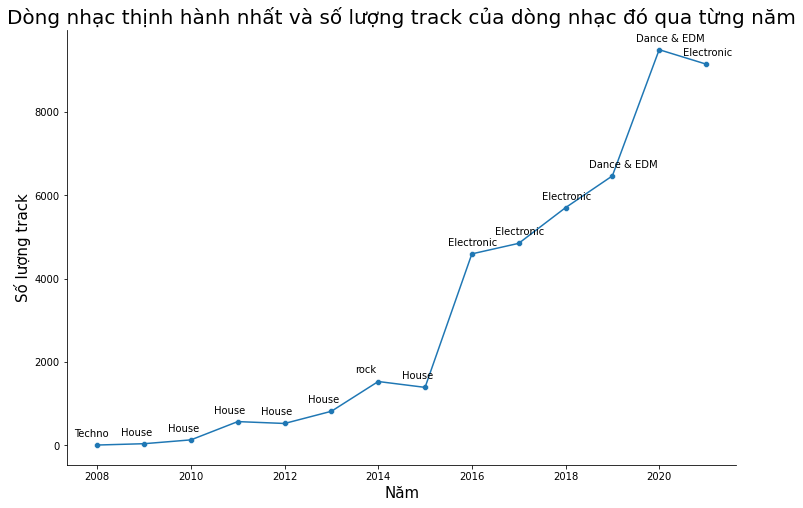

In [20]:
# Dòng nhạc thịnh hành qua từng năm
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Số lượng track
ax = sns.lineplot(data=grouped_data, x=grouped_data.index.to_list(), y='freq')

# Thêm tên của dòng nhạc
sns.scatterplot(data=grouped_data, x=grouped_data.index.to_list(), y='freq', markers=True, legend=False)
for i in range(grouped_data.shape[0]):
    ax.annotate(grouped_data.iloc[i, 2], (grouped_data.index[i] - 0.5, grouped_data.iloc[i, -1] + 200))

# Tùy chỉnh biểu đồ
ax.set_title('Dòng nhạc thịnh hành nhất và số lượng track của dòng nhạc đó qua từng năm', fontdict={'size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Năm', fontdict={'size':15})
ax.set_ylabel('Số lượng track', fontdict={'size':15})

Với các kết quả thu được, chúng ta có các nhận xét sau:
- Các dòng nhạc **Electronic** thống trị *Soundcloud*.
- Có sự tăng mạnh số lượng track trong năm 2016 và năm 2020 bởi một số nguyên nhân sau:
  - **Năm 2016**: sự nổi lên của phong cách **Mumble Rap** với giai điệu đơn giản và bắt tai đã lan truyền mạnh mẽ trên *Soundcloud*.
  - **Năm 2020**: sự xuất hiện của **Covid-19** và phong tỏa ở nhiều nước phần nào đó ảnh hưởng đến số lượng track tăng cao.
- Với sự tăng lên của số lượng track qua từng năm cho ta thấy rằng sự phổ biến của nền tảng chia sẻ nhạc miễn phí *Soundcloud* càng ngày càng rộng rãi với những nhà sản xuất nhạc thiếu điều kiện, đặc biệt là giới *Underground*.

# 4. Đất nước có nhiều nghệ sĩ được xác minh (verified)
- Bảng dữ liệu cần sử dụng: `user`
- Các trường cần sử dụng: `verified`, `country_code`
- Kiểu dữ liệu mong đợi của các trường được sử dụng:
    - `verified`: *boolean*
    - `country_code`: *string*
- Các vấn đề có thể xảy ra: `country_code` có thể chứa missing values do người dùng không nhập.
- Hướng giải quyết: sử dụng **Bar chart** để trực quan hóa **10** nước có số lượng nghệ sĩ đã được xác minh nhiều nhất.
- Dự đoán kết quả: Mỹ và Đức sẽ là các quốc gia có lượt verified cao nhất. 

Với câu hỏi này, ta sẽ sử dụng dữ liệu `user` với các trường: `country_code` và `verified`. Cụ thể, ta sẽ đếm số lượng nghệ sĩ *được xác minh* trong từng quốc gia. Các bước thực hiện:
1. Lựa ra các dòng có cột `verified` bằng `True`
2. Nhóm dữ liệu bởi trường `country_code`.
3. Đếm số lượng nghệ sĩ `verified`.
4. Trực quan hóa **10** quốc gia có nhiều nghệ sĩ verified nhất bằng **Bar chart**.

In [21]:
# Clone dữ liệu để tránh chỉnh sửa dữ liệu gốc
data_df = user_df[['country_code', 'verified']].copy()

# Lựa ra nghệ sĩ verified
data_df = data_df.loc[data_df['verified'] == True]

# Nhóm dữ liệu bởi trường country_code
grouped_data = data_df.groupby(by=['country_code'])

# Đếm số lượng nghệ sĩ verified và sort theo descending
grouped_data = grouped_data.count().sort_values(by='verified',ascending=False)

grouped_data.head(10)

,verified
country_code,
unknown,1642
US,512
GB,157
NL,147
DE,135
FR,111
CA,101
AU,79
BR,64


Tiếp theo là tiến hành trực quan hóa dữ liệu. Thế nhưng nếu chỉ để nguyên giá trị `country_code` sẽ gây khó hiểu, do đó, chúng ta sẽ replace các giá trị này bằng tên của Quốc gia tương ứng.

Text(0, 0.5, 'Tên quốc gia')

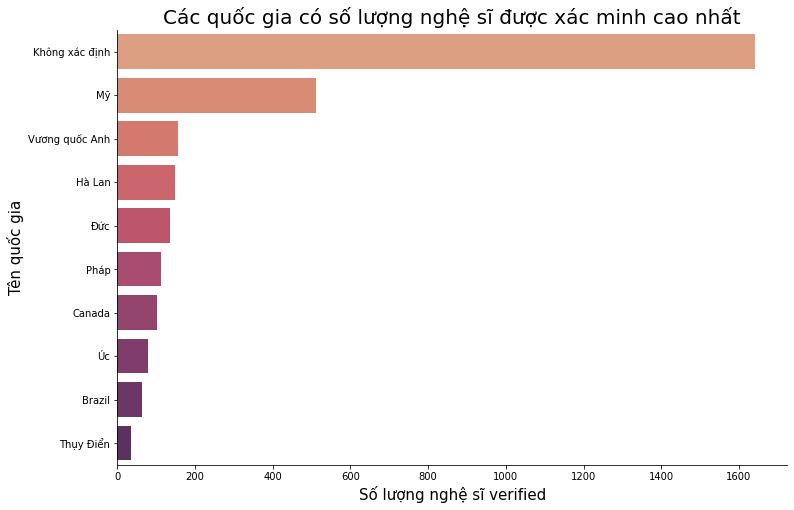

In [22]:
# Gán lại tên các Quốc gia
plot_data = grouped_data[:10]
plot_data.index = ['Không xác định', 'Mỹ', 'Vương quốc Anh', 'Hà Lan', 'Đức', 'Pháp', 'Canada', 'Úc', 'Brazil', 'Thụy Điển']

# 10 Quốc gia có số lượng nghệ sĩ verified nhiều nhất
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Barplot
ax = sns.barplot(data=plot_data[:10], y=plot_data.index[:10], x='verified', palette='flare')

# Tùy chỉnh biểu đồ
ax.set_title('Các quốc gia có số lượng nghệ sĩ được xác minh cao nhất', fontdict={'size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Số lượng nghệ sĩ verified', fontdict={'size':15})
ax.set_ylabel('Tên quốc gia', fontdict={'size':15})

Dựa vào các kết quả thu được, chúng ta có các nhận xét sau:
- Thật ngạc nhiên khi mà số nghệ sĩ có quốc gia không xác định lại được **xác minh** nhiều đến thế. Có thể *quốc gia* không phải là tiêu chí để *Soundcloud* xác minh nghệ sĩ.
- Nếu không tính quốc gia không xác định thì **Mỹ** là quốc gia có *số lượng nghệ sĩ được xác minh nhiều nhất*, hơn vượt bậc so với quốc gia xếp hạng kế tiếp: Vương quốc Anh. Nguyên do có thể là do **Mỹ** có số lượng **Rapper** (chủ yếu là các Rapper da màu) nhiều mà theo như chúng ta đã phân tích ở câu hỏi trước thì *Soundcloud* rất phổ biến cho giới *Underground*, đặc biệt là **Rapper**.
- Ngoài ra, chúng ta có thể thấy rằng đa số các quốc gia ở đây là các *quốc gia phát triển* và hầu như ngôn ngữ chủ yếu là *tiếng Anh* (Châu Âu và Bắc Mĩ).

# 5. Sự tương quan giữa nghệ sĩ được xác minh (verified) và lượt nghe các track của họ
- Bảng dữ liệu cần sử dụng: `user` và `track`
- Các trường cần sử dụng: `id`, `verified` (trong `user`) và `user_id`, `playback_count` (trong `track`)
- Kiểu dữ liệu mong đợi của các trường được sử dụng:
    - `id`: *int64 / float64*
    - `verified`: *boolean*
    - `user_id`: *int64 / float64* (phải có cùng kiểu với kiểu của trường `id`)
    - `playback_count`: *int64 / float64*
- Các vấn đề có thể xảy ra: `playback_count` có thể chứa missing values do một số bài bị hạn chế người xem, chế độ *private*.
- Hướng giải quyết: sử dụng **Thống kê** và **Box plot** để so sánh số lượt nghe của mỗi nhóm.
- Dự đoán kết quả: Số lượng lượt nghe sẽ cao hơn ở nhóm nghệ sĩ đã được xác minh.
  
Để giải quyết câu hỏi này, chúng ta sẽ sử dụng cả 2 bảng `user` và `track`. Cụ thể, với mỗi nghệ sĩ (user), ta đếm số lượng nghe lại của các bài hát thuộc về user đó. Sau đó, chia thành 2 nhóm *được xác minh* và *chưa được xác minh*, rồi tiến hành so sánh dựa trên phân bố của chúng. Các bước thực hiện:
1. Với bảng `track`, nhóm dữ liệu bởi `user_id` và đếm tổng số `playback_count` của user đó.
2. Inner join với bảng `user` dựa trên `user_id`.
3. Dùng **Box plot** trực quan hóa phân bố `playback_count` của 2 nhóm: *chưa được xác minh* và *đã được xác minh*
4. Dùng thống kê để tính chính xác *Tứ phân vị* của dữ liệu.

In [23]:
# Clone dữ liệu để tránh chỉnh sửa trên dữ liệu gốc
data_df = track_df[['playback_count', 'user_id']]

# Nhóm dữ liệu bởi user_id
grouped_data = data_df.groupby(by='user_id')

# Tỉnh tổng playback_count
grouped_data = grouped_data.sum()

# Inner join với bảng user dựa trên user_id
merged_data = pd.merge(left=grouped_data,
                       right=user_df[['id', 'verified']],
                       left_on='user_id',
                       right_on='id',
                       how='inner'
                      )

# Chỉnh sửa lại kiểu dữ liệu cột verified
merged_data['verified'] = merged_data['verified'].apply(lambda val: str(val)) 

merged_data

,playback_count,id,verified
0,1130385.0,187,True
1,455130.0,193,True
2,38979045.0,203,True
3,38979045.0,203,True
4,4699872.0,215,True
...,...,...,...
8870,491.0,1041176245,False
8871,489.0,1041442963,False
8872,77.0,1042109443,False
8873,5720.0,1043011867,False


Tiếp theo, ta tiến hành trực quan hóa dữ liệu bằng **Box plot**.

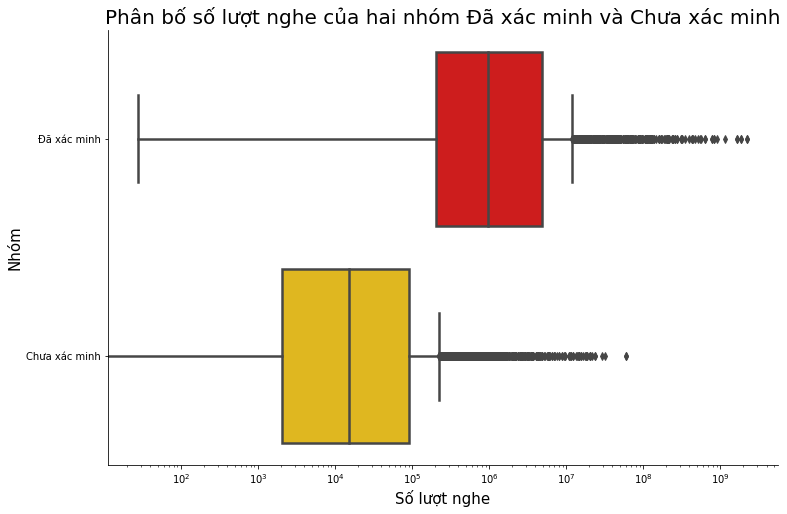

In [51]:
# Phân bố số lượt nghe của hai nhóm Đã xác minh và Chưa xác minh
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Boxplot
ax = sns.boxplot(data=merged_data, 
                 x='playback_count', 
                 y='verified', 
                 palette='hot', 
                 linewidth=2.5,
                 fliersize=5,
                 order=['True', 'False'],
                )

# Tùy chỉnh biểu đồ
ax.set_title('Phân bố số lượt nghe của hai nhóm Đã xác minh và Chưa xác minh', fontdict={'size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Số lượt nghe', fontdict={'size':15})
ax.set_ylabel('Nhóm', fontdict={'size':15})
ax.set_yticklabels(labels=['Đã xác minh', 'Chưa xác minh'])
ax.set_xscale('log')

Biểu đồ ở trên không thể hiện rõ *Tứ phân vị* (Quartile) của dữ liệu, nên ta sẽ tự tính toán các con số

In [25]:
# Thống kê của dữ liệu
merged_data[['playback_count', 'verified']].groupby(by='verified').describe()

playback_count                                                        \
                  count          mean           std   min       25%       50%   
verified                                                                        
False            5870.0  2.947729e+05  1.818978e+06   0.0    2075.0   15104.5   
True             3005.0  1.691470e+07  1.033694e+08  28.0  202711.0  961183.0   

                                    
                 75%           max  
verified                            
False       91046.25  5.989130e+07  
True      4882021.00  2.239520e+09

Với các kết quả ở trên, ta có nhận xét sau:
- Dễ dàng thấy được số lượt nghe của nhóm **Đã xác minh** cao hơn hẳn so với nhóm **Chưa xác minh** qua các thông kê như **mean** và **median**. Chúng ta có thể giải thích điều này như sau: các nghệ sĩ **được xác minh** phải là nghệ sĩ *nổi tiếng*, vì vậy số lượt nghe của họ được *buff* với lượng fan đông đảo sẵn sàng *cày* lượt nghe cho idol của mình.

# 6. Trong năm, thời gian nào được nhiều người đăng bài nhất? 

  - Bảng dữ liệu cần sử dụng: `track`
  - Các trường cần sử dụng: `created_at`
  - Hướng giải quyết: Để có thể giải quyết câu hỏi, sẽ thống kê số bài hát mà người dùng đăng theo mỗi tháng dựa trên dữ liệu đã thu thập được. Trong bài này sẽ sử dụng `bar chart` để trực quan hoá dữ liệu. 
  - Dự đoán kết quả: Số bài hát mà người dùng đăng theo mỗi tháng sẽ không chênh lệch nhau quá nhiều. Hay nói cách khác, trong năm, số bài hát được đăng rải đều mỗi tháng.  

## Tiền xử lý dữ liệu
Với câu hỏi trên, chúng ta sẽ tập trung xử lý: Tập dữ liệu `track` với trường `created_at`

Tiến hành load dữ liệu từ file `csv` và lọc ra các trường cần thiết.

In [26]:
df_track = pd.read_csv('./track.csv')
df_track = df_track[['created_at']].reset_index(drop=True)

In [27]:
df_track

,created_at
0,2021-10-29T08:43:42Z
1,2021-10-15T09:37:00Z
2,2021-09-24T08:55:16Z
3,2021-09-17T07:35:14Z
4,2021-09-03T09:40:32Z
...,...
633011,2016-06-03T00:19:48Z
633012,2016-10-07T00:10:43Z
633013,2017-08-11T00:28:14Z
633014,2017-09-21T22:34:33Z


Vì trường `created at` được tạo mặc định bởi SoundCloud mỗi khi người dùng đăng bất kỳ bài hát nào, nên trường này không có missing_values. Vì thế chúng ta không xử lý drop missing_values ở trường `created at`

## Phân tích dữ liệu 
Dựa vào trường `created_at`, ta sẽ xem xét số bài hát được đăng theo tháng. 
Các bước thực hiện:
1. Tạo list `month_list` liệt kê số tháng có trong năm theo dạng '-01-'. Vì trường `created_at` có cách ghi kiểu dữ liệu ngày giờ theo chuẩn thời gian ISO 8601 (Ex: 2016-10-07T00:10:43Z), nên để lấy được tháng phải chọn cách lấy theo tháng như vậy ('-01-').
2. Nhóm dữ liệu theo các tháng được liệt kê trong `month_list`. 
3. Với mỗi tháng, đếm số bài hát được đăng qua từng năm. 
4. Sử dụng **Bar chart** để trực quan hóa sự thay đổi này.

In [28]:
#Tạo list number_of_songs
number_of_songs = [] 

#Tạo month_list để liệt kê các tháng theo dạng '-01-' 
month_list = ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']

#Đếm số bài hát được đăng qua trường 'created_at' trong tập dữ liệu track
for month in month_list:
    track = df_track.loc[df_track['created_at'].str.contains(month, case=False)]
    number_of_songs.append(len(track.index))

In [29]:
#Tạo data frame với 2 trường month và number_of_songs để thống kê số bài hát được đăng theo tháng 
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
data_df = pd.DataFrame(list(zip(month, number_of_songs)),
               columns =['Month', 'Number of Songs'])
data_df

,Month,Number of Songs
0,01,51559
1,02,47795
2,03,53799
3,04,52697
4,05,55785
5,06,53347
6,07,55092
7,08,54145
8,09,55102
9,10,58389


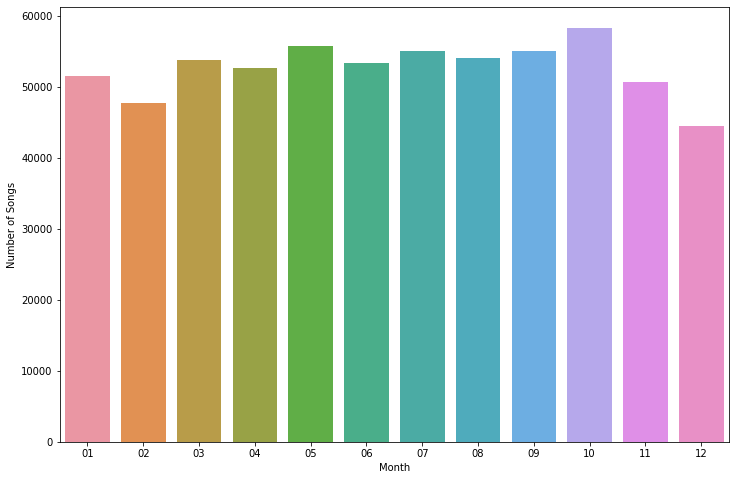

In [52]:
#Sử dụng bar chart để trực quan hoá dữ liệu 
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="Month", y="Number of Songs", data=data_df[["Month","Number of Songs"]])

Với các kết quả thu được, chúng ta có các nhận xét sau:
- Khoảng thời gian từ tháng 5 đến tháng 10, có nhiều người đăng bài nhất. 
- Số bài hát được đăng trong mỗi tháng không có sự chênh lệch nhau quá nhiều (~40,000 - 60,000 bài hát trong mỗi tháng). 

# 7. Dòng nhạc nào được nhiều người thích nhất 

- Tập dữ liệu sử dụng: `track`
- Trường cần sử dụng: `genre`, `likes_count`
- Kiểu dữ liệu mong đợi ở các trường: 
   - `genre`: strings 
   - `likes_count`: numerical 
- Vấn đề đặt ra: tìm ra dòng nhạc nào nhiều người thích nhất.
- Hướng giải quyết: Sử dụng **Bar chart** để trực quan hoá dữ liệu là dòng nhạc với số lượt thích tương ứng. 
- Dự đoán kết quả: Có thể là HipHop & Rap, Electronic vì 2 dòng nhạc này phổ biến không chỉ trên SoundCloud mà còn ở bất cứ platform nghe nhạc nào. 

## Tiền xử lý dữ liệu
Với câu hỏi trên, chúng ta sẽ tập trung xử lý: Tập dữ liệu `track` với trường `genre` và `likes_count`

Tiến hành load dữ liệu từ file `csv` và lọc ra các trường cần thiết.

In [31]:
df_track = pd.read_csv('./track.csv')
df_track = df_track[['genre','likes_count']].reset_index(drop=True)
df_track

,genre,likes_count
0,Dance & EDM,49.0
1,Dance & EDM,87.0
2,Chill Out,129.0
3,Dance & EDM,380.0
4,Dance & EDM,356.0
...,...,...
633011,Tecnologia,NaN
633012,Negócio,NaN
633013,Negócios,NaN
633014,Negócios,NaN


### Giá trị thiếu (Missing Values)
Tiếp theo, chúng ta sẽ tiến hành xử lý dữ liệu thiếu. Đầu tiên, chúng ta sẽ xem xét xem trường nào bị thiếu, thiếu bao nhiêu và chiếm bao nhiêu phần trăm dữ liệu.

In [32]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = df_track.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/df_track.shape[0] * 100)
track_mv.index = df_track.columns

track_mv

,Số lượng,Phần trăm
genre,109085,17.232582
likes_count,33955,5.364003


Tiếp theo, chúng ta sẽ tiến hành phân tích các trường và đưa ra cách giải quyết phù hợp:
- `genre`: thuộc kiểu categorical $\rightarrow$ chỉ chiếm khoảng 17% và chúng ta không thể phân tích gì được với thể loại nhạc không xác định, cho nên với trường này chúng ta sẽ tiên hành drop các missing values.
- `likes_count`: thuộc kiểu numerical $\rightarrow$ tương tự như trường `genre`, chúng ta sẽ drop các missing values.

In [33]:
# Drop mv ở trường genre và playback_count
df_track.dropna(inplace=True) 

In [34]:
# Track
track_mv = pd.DataFrame()
track_mv['Số lượng'] = df_track.isna().sum().values
track_mv['Phần trăm'] = track_mv['Số lượng'].apply(lambda val: val/df_track.shape[0] * 100)
track_mv.index = df_track.columns

track_mv

,Số lượng,Phần trăm
genre,0,0.0
likes_count,0,0.0


### Xử lý dữ liệu nhiễu
Chúng ta xem qua dữ liệu trường `genre` của `df_track` 

In [35]:
df_track.genre.value_counts()

Electronic       42472
Dance & EDM      37444
House            31728
Techno           20481
Hip-hop & Rap    18706
                 ...  
STERAC               1
makcim&levi          1
queenleaf            1
nightmusik           1
myapple daily        1
Name: genre, Length: 41729, dtype: int64

Ta nhận thấy có một vài trường hợp người dùng tự định nghĩa genre của bài hát, nên ta sẽ sử dụng các genre có trên **3000** record. 

In [36]:
#Tiến hành filter dữ liệu, chỉ lấy các genre có trên 3000 records và lưu vào df mới có tên là popular_genre
all_genre = df_track["genre"].value_counts()
all_genre = all_genre.reset_index()
all_genre.columns = ['All_Genre','counts']
popular_genre=all_genre[all_genre.counts > 3000].copy()
popular_genre

,All_Genre,counts
0,Electronic,42472
1,Dance & EDM,37444
2,House,31728
3,Techno,20481
4,Hip-hop & Rap,18706
5,Dubstep,16621
6,Deep House,15891
7,Drum & Bass,15283
8,Dance,13457
9,Trap,10111


Ta sẽ sử dụng df `popular_genre` để xử lý câu hỏi được đặt ra 

## Phân tích dữ liệu 
Dựa vào trường `genre` và `likes_count`, ta sẽ xem xét dòng nhạc nào có nhiều lượt thích nhất, từ đó sẽ kết luận được dòng nhạc nào sẽ có nhiều người thích. 

Các bước thực hiện:
1. Đầu tiên, ta tạo list `genre_list` được chuyển đổi từ df `popular_genre`. 
2. Sử dụng `genre_list` để tính tổng số lượt likes của của từng `genre` dựa trên `likes_count` trong df `df_track` ban đầu. 
3. Sử dụng **Bar chart** để trực quan hoá dữ liệu

In [37]:
#Tạo list genre_list
genre_list = popular_genre['All_Genre'].tolist() 
genre_list

['Electronic',
 'Dance & EDM',
 'House',
 'Techno',
 'Hip-hop & Rap',
 'Dubstep',
 'Deep House',
 'Drum & Bass',
 'Dance',
 'Trap',
 'Pop',
 'Ambient',
 'Trance',
 'Soundtrack',
 'Rock',
 'Progressive House',
 'Tech House',
 'Disco',
 'R&B & Soul',
 'Alternative Rock',
 'Indie']

In [38]:
#Tạo likes_countList 
likes_countList = []

#Tính tổng số lượt likes của mỗi genre 
for genre in genre_list:
    sum_genre = df_track[df_track['genre']==genre]['likes_count'].sum() 
    likes_countList.append(sum_genre)
#Merge dữ liệu số lượt likes vào df popular_genre 
popular_genre["genre_likes"] = likes_countList
popular_genre

,All_Genre,counts,genre_likes
0,Electronic,42472,71372785.0
1,Dance & EDM,37444,56917307.0
2,House,31728,38258162.0
3,Techno,20481,12867075.0
4,Hip-hop & Rap,18706,114668853.0
5,Dubstep,16621,41073672.0
6,Deep House,15891,24388380.0
7,Drum & Bass,15283,14041520.0
8,Dance,13457,31351490.0
9,Trap,10111,24317506.0


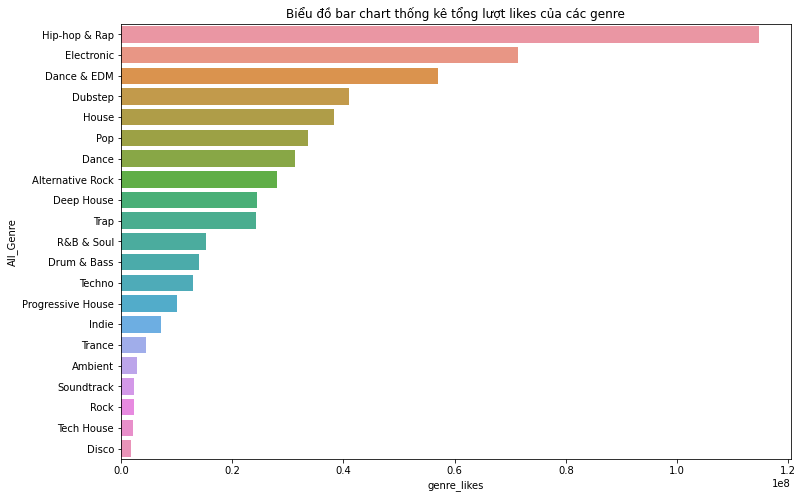

In [63]:
#Sử dụng bar chart để trực quan hoá dữ liệu 
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="genre_likes", y="All_Genre", data=popular_genre[["All_Genre","genre_likes"]].sort_values('genre_likes', ascending=False),orient = "h")
plt.title("Biểu đồ bar chart thống kê tổng lượt likes của các genre")
plt.show()

Với những gì thu thập được, ta có vài nhận xét như sau: 
- Dễ dàng thấy số lượt likes của Hip-hop & Rap có lượt likes cao nhất trong tất cả các genre, có thể vì lý do sau: 
    - Có thể vì **Hip-hop & Rap** là một trong những genre đã xuất hiện từ rất lâu, hiện vẫn rất thịnh hành và được ưa chuộng tại Mỹ & các nước Châu Âu (vốn dĩ là các thị trường âm nhạc lớn và lượng người sử dụng SoundCloud khá nhiều), thậm chí là ở các nước Châu Á.
    - Số lượng người sử dụng SoundCloud để **đăng bài hát** đa phần là các nghệ sĩ Underground sử dụng genre **Hip Hop & Rap**. Bên cạnh đó, lượng người sử dụng SoundCloud để **nghe bài hát** phần lớn cũng là cụm khán giả thích loại genre này.
    
- Số lượng bài hát của genre Electronic khá lớn (Chiếm 1/10 số lượng bài hát trong tệp dữ liệu đang xét) nhưng lượt likes ít hơn so với Hip-hop & Rap. 
    - Vì số nghệ sĩ đăng bài ở genre Electronic nhiều nhưng lượng người dùng SoundCloud thích và nghe các bài hát ở genre này không quá nhiều.

Ta có thể thống kê thêm lượt thích trung bình ở các bài hát trong 1 genre để có cái nhìn chi tiết hơn, như sau: 

In [40]:
#Để tính lượt thích trong bình ở mỗi bài hát trong từng genre
#Ta lấy số likes của mỗi genre chia cho số bài hát trong mỗi genre
popular_genre["Average"]=popular_genre["genre_likes"]/popular_genre["counts"]

In [41]:
popular_genre

,All_Genre,counts,genre_likes,Average
0,Electronic,42472,71372785.0,1680.466778
1,Dance & EDM,37444,56917307.0,1520.064817
2,House,31728,38258162.0,1205.817007
3,Techno,20481,12867075.0,628.244470
4,Hip-hop & Rap,18706,114668853.0,6130.057361
5,Dubstep,16621,41073672.0,2471.191384
6,Deep House,15891,24388380.0,1534.729092
7,Drum & Bass,15283,14041520.0,918.767258
8,Dance,13457,31351490.0,2329.753288
9,Trap,10111,24317506.0,2405.054495


Text(0.5, 1.0, 'Biểu đồ bar chart thống kê lượt likes trung bình của các bài hát trong một genre')

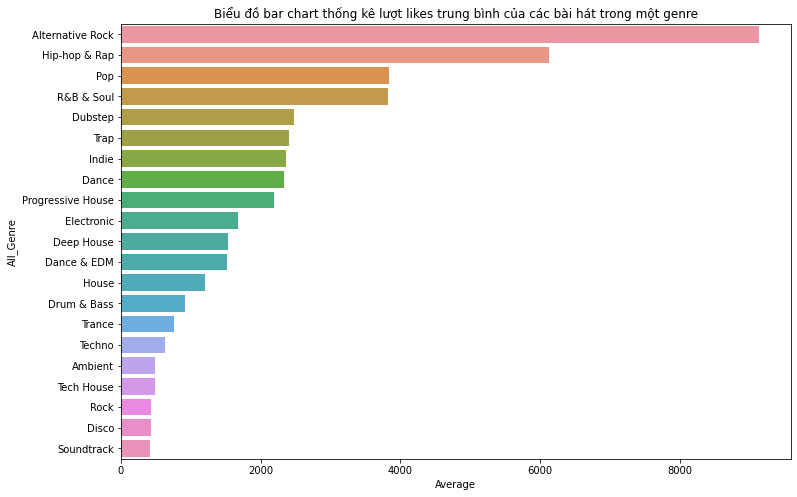

In [60]:
#Biểu đồ bar chart
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax = sns.barplot(x="Average", y="All_Genre", data=popular_genre[["All_Genre","Average"]].sort_values('Average', ascending=False),orient = "h")
plt.title("Biểu đồ bar chart thống kê lượt likes trung bình của các bài hát trong một genre")

Với kết quả trên, ta có nhận xét như sau: 
- Lượng người thích **Alternative Rock** trên SoundCloud không quá cao nhưng lượt likes trung bình mỗi bài hát rất nhiều. 
    - Lý do có thể là lượng người sử dụng SoundCloud để nghe bài hát rất thích loại genre này nhưng số nghệ sĩ đăng bài ở genre này trên SoundCloud rất ít. 

# 8. Sự tương quan giữa `followers_count` và các biến đếm khác
- Tập dữ liệu sử dụng: `user`
- Trường cần sử dụng: `comments_count`, `followers_count`, `followings_count`, `likes_count`, `playlist_likes_count`, `playlist_count`, `track_count`
- Kiểu dữ liệu mong đợi ở các trường: tất cả đều là **numerical** 
- Vấn đề đặt ra: tìm ra sự tương quan giữa `followers_count` và các biến đếm khác
- Hướng giải quyết: Sử dụng **Scatter plot** để trực quan mối quan hệ giữa `followers_count` và các biến đếm khác.
- Dự đoán kết quả: user có `followers_count` cao thì các biến đếm khác cũng cao

Lượt follow giúp bài hát của user đó được lan truyền nhanh hơn, từ đó độ nổi tiếng của user đó cũng được tăng theo. Vì vậy nếu ta tìm được mối quan hệ giữa các thuộc tính của một user và lượt follow của user đó, thì chỉ cần làm theo quan hệ này là lượt follow sẽ được tăng.

Để trả lời câu hỏi này, ta sẽ xem mối quan hệ giữa các trường đếm khác với followers_count. Trước hết ta xem các biến đếm này có bị thiếu dữ liệu hay không?

## Tiền xử lý dữ liệu

In [66]:
# Load dataset
df = pd.read_csv("./user.csv")

list_count_cols = [col for col in df.columns if 'count' in col]

# We remove country_code from list_count_cols
list_count_cols.remove('country_code')
print('-'*30)
print(df[list_count_cols].info())

------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12029 entries, 0 to 12028
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   comments_count        12029 non-null  int64
 1   followers_count       12029 non-null  int64
 2   followings_count      12029 non-null  int64
 3   likes_count           12029 non-null  int64
 4   playlist_likes_count  12029 non-null  int64
 5   playlist_count        12029 non-null  int64
 6   track_count           12029 non-null  int64
dtypes: int64(7)
memory usage: 658.0 KB
None


Kết quả trả về cho ta thấy các cột này đều đầy đủ dữ liệu nên ta không cần phải xử lý việc điện dữ liệu thiếu.

## Phân tích dữ liệu:

Tiếp theo trước khi mối quan hệ giữa các biến count này với playlist_count, ta trực quan hóa phân bố của chúng để xem có cần loại bỏ outlier không?

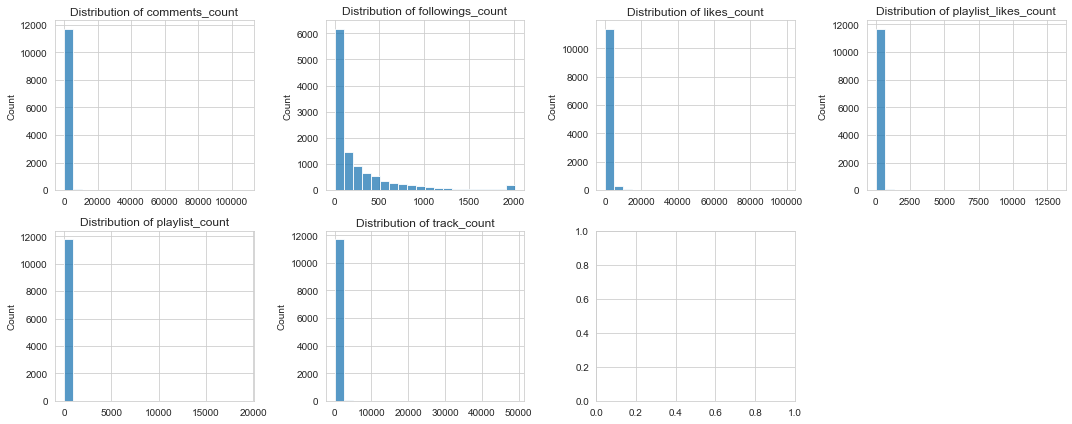

In [78]:
fig, axes = plt.subplots(2,4, figsize=(15, 6))
for col, ax in zip(list_count_cols, axes.flatten()):
    sns.histplot(data=df, x=col, bins=20, ax=ax)
    ax.set(title=f'Distribution of {col}', xlabel=None)

fig.delaxes(axes[1,3])
fig.tight_layout()
plt.show()


Qua đó ta thấy toàn bộ thuộc tính đều bị lệch dương và lệch rất nặng, gần như toàn bộ dữ liệu nằm trong cột trái. Vì vậy ta sẽ đi loại đi outlier bằng cách dùng IQR. Sau đó ta plot lại histogram của từng thuộc tính để xem lại phân bố. 

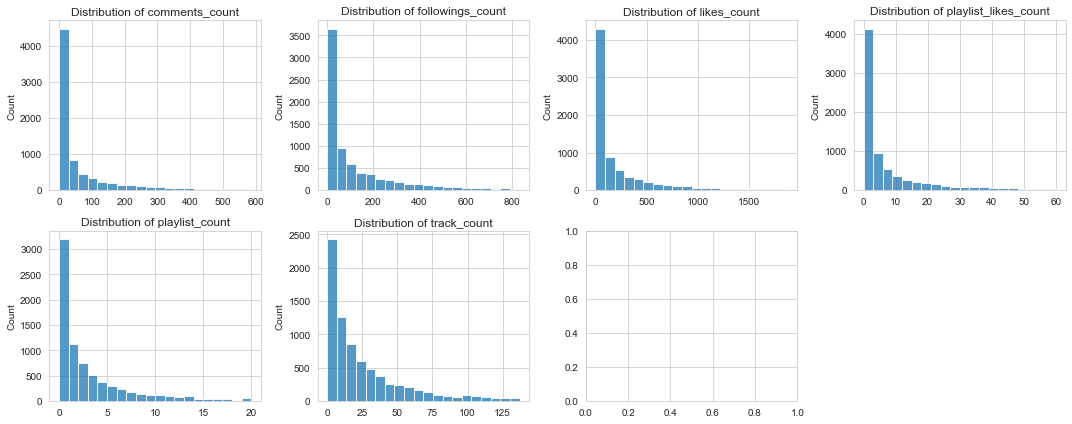

In [79]:
Q1 = df[list_count_cols].quantile(0.25)
Q3 = df[list_count_cols].quantile(0.75)
IQR = Q3 - Q1

df_without_outlier = df[~((df[list_count_cols] < (Q1 - 1.5 * IQR)) |(df[list_count_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

fig, axes = plt.subplots(2,4, figsize=(15, 6))
for col, ax in zip(list_count_cols, axes.flatten()):
    sns.histplot(data=df_without_outlier, x=col, bins=20, ax=ax)
    ax.set(title=f'Distribution of {col}', xlabel=None)

fig.delaxes(axes[1,3])
fig.tight_layout()
plt.show()

Kết quả cho thấy các phân bố đã đỡ lệch hơn nhưng vẫn còn và vì tất cả đều cùng lệch dương nên ta có thể dùng tập dữ liệu này để đi xem mối quan hệ giữa các biến đếm và lượt follow. Ta sẽ làm điều này bằng scatter plot

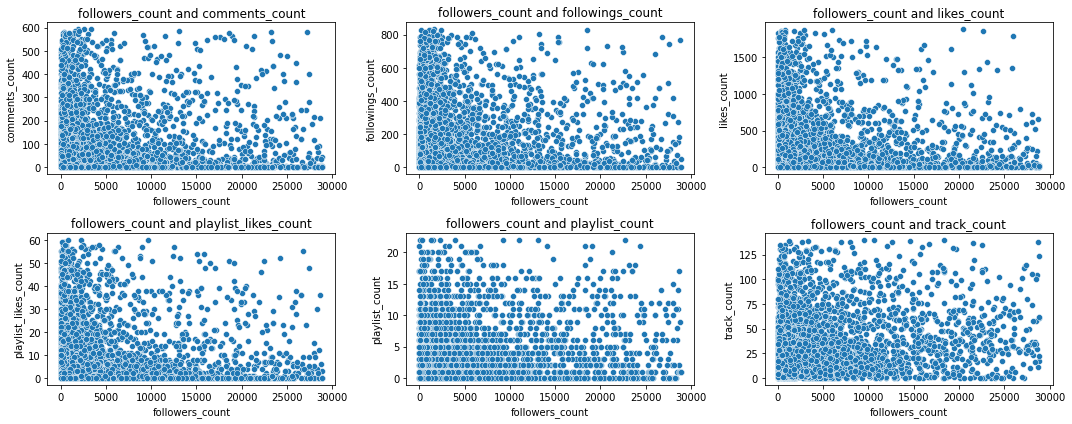

In [69]:
if 'followers_count' in list_count_cols:
    list_count_cols.remove('followers_count')
    
fig, axes = plt.subplots(2,3, figsize=(15, 6))
for col, ax in zip(list_count_cols, axes.flatten()):
    sns.scatterplot(data=df_without_outlier, x='followers_count', y=col, ax=ax)
    ax.set(title=f'followers_count and {col}')

fig.tight_layout()
plt.show()


Qua ma trận các scatter plot trên, có vẻ là giữa các biến đếm và followers_count tỉ lệ nghịch với nhau nghĩa là muốn nhiều người follow thì làm mọi thứ ít lại, điều này thoạt nghe có vẻ vô lý nên ta xem qua thử 15 user có nhiều người follow nhất.

In [70]:
top_15_most_followers_count = df.sort_values('followers_count', ascending=False).head(15)
top_15_most_followers_count

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
2314,https://i1.sndcdn.com/avatars-QF34Hty2xnwv4hVV...,"Dumfries, Scotland",3,NaN,2009-08-13T18:55:00Z,7167317,0,Calvin,208934,2021-08-06T04:16:47Z,Harris,0,0,https://soundcloud.com/calvinharris,70,328,Calvin Harris,True
1617,https://i1.sndcdn.com/avatars-cBNtGGxT9Is4zSEy...,Philadelphia,97,US,2008-10-05T04:00:12Z,7102943,1148,diplo,16730,2021-09-28T17:00:35Z,NaN,646,36,https://soundcloud.com/diplo,88,524,Diplo,True
10167,https://i1.sndcdn.com/avatars-cBNtGGxT9Is4zSEy...,Philadelphia,97,US,2008-10-05T04:00:12Z,7102921,1146,diplo,16730,2021-09-28T17:00:35Z,NaN,642,36,https://soundcloud.com/diplo,88,524,Diplo,True
2760,https://i1.sndcdn.com/avatars-Hj4vOjdcx2256uzp...,Los Angeles,9,US,2010-04-12T17:48:00Z,6497175,95,Sonny,856062,2021-08-20T04:05:03Z,Moore,14,3,https://soundcloud.com/skrillex,23,110,Skrillex,True
10342,https://i1.sndcdn.com/avatars-Hj4vOjdcx2256uzp...,Los Angeles,9,US,2010-04-12T17:48:00Z,6496955,95,Sonny,856062,2021-08-20T04:05:03Z,Moore,14,3,https://soundcloud.com/skrillex,23,110,Skrillex,True
8206,https://i1.sndcdn.com/avatars-UeyAINJUDtKizwXG...,Toronto,0,CA,2011-02-21T11:21:15Z,6286500,0,NaN,3274725,2021-08-06T13:47:12Z,NaN,0,0,https://soundcloud.com/theweeknd,35,217,The Weeknd,True
10692,https://i1.sndcdn.com/avatars-UeyAINJUDtKizwXG...,Toronto,0,CA,2011-02-21T11:21:15Z,6285724,0,NaN,3274725,2021-08-06T13:47:12Z,NaN,0,0,https://soundcloud.com/theweeknd,35,217,The Weeknd,True
2208,https://i1.sndcdn.com/avatars-4UOzW0YzsEUnMtkx...,Los Angeles,33,US,2009-06-17T19:24:28Z,6137580,451,Dillon,146393,2021-10-29T04:02:54Z,Francis,54,1,https://soundcloud.com/dillonfrancis,43,274,DILLONFRANCIS,True
10346,https://i1.sndcdn.com/avatars-000000711562-05g...,Toronto,6,CA,2009-10-09T20:16:57Z,6011803,189,Zeds,305413,2021-10-05T15:51:24Z,Dead,80,3,https://soundcloud.com/zedsdead,85,263,Zeds Dead,True
3122,https://i1.sndcdn.com/avatars-000302284113-fhx...,#HDYNATION,244,US,2009-10-13T21:20:08Z,5882349,335,#HDYBYZ,312963,2020-11-18T17:40:48Z,NaN,204,11,https://soundcloud.com/flosstradamus,26,133,Flosstradamus,True


### Nhận xét:
Các user này đã đúng theo suy luận ở trên, mặc dù lượng follower rất cao nhưng các thuộc tính đếm còn lại của user này thì lại rất thấp. Vì vậy để rõ hơn, tôi đã vào trang Soundcloud của các user này. Tôi đã đặt khía cạnh mình là một người nghe nhạc bình thường thì sau khi nghe nhạc của các user này, có thể nói là tất cả bài hát của họ rất "catchy", nghĩa là nghe rất lọt tai, nốt thăng nốt trầm hợp lý. Và trong 15 user này, có nhiều dòng nhạc khác nhau nhưng chiếm nhiều nhất là dòng nhạc điện tử (EDM). Với dòng nhạc này thì có user tự sáng tác, có user đi remix lại các hit của các dòng nhạc (Pop, R&B, ...).

Tôi cũng có đi xem thử các user có các thuộc tính đếm khác cao nhưng lại có lượt follow không quá cao. Điểm chung của các user này là nhạc của họ rất freestyle và nghiệp dư. Các thuộc tính đếm cao như lượt comment, lượt like, lượt share, lượt following (là user này follow user khác) đều liên quan đến vấn đề tương tác, và các người tương tác với các user này cũng là user nghiệp dư và sáng tạc freestyle. Vì vậy có vẻ các user có biến đếm tương tác cao là vì họ nhận xét, khen chê nhạc lẫn nhau trong cộng đồng của họ. Tôi cũng có dùng một correlogram (xem bên dưới) để xem giữa các bếp tương tác này có quan hệ gì với nhau không thì dường như là không, chỉ có vài cặp có xu hướng tỉ lệ nghịch với nhau nhưng không rõ.

Từ đó có thể rút ra kết luận, để tăng lượt follow, có vẻ là việc sáng tác nhạc chất lượng, nhạc hay là cách tốt nhất ở trên Soudcloud chứ việc kiếm tương tác nhiều sẽ không tăng lượt follow của ta. Ngoài ra qua các tìm hiểu này ta cũng rút ra xu hướng của mọi người là khi nghe các bài hát hay, họ chỉ thích nghe chứ không thích tương tác.



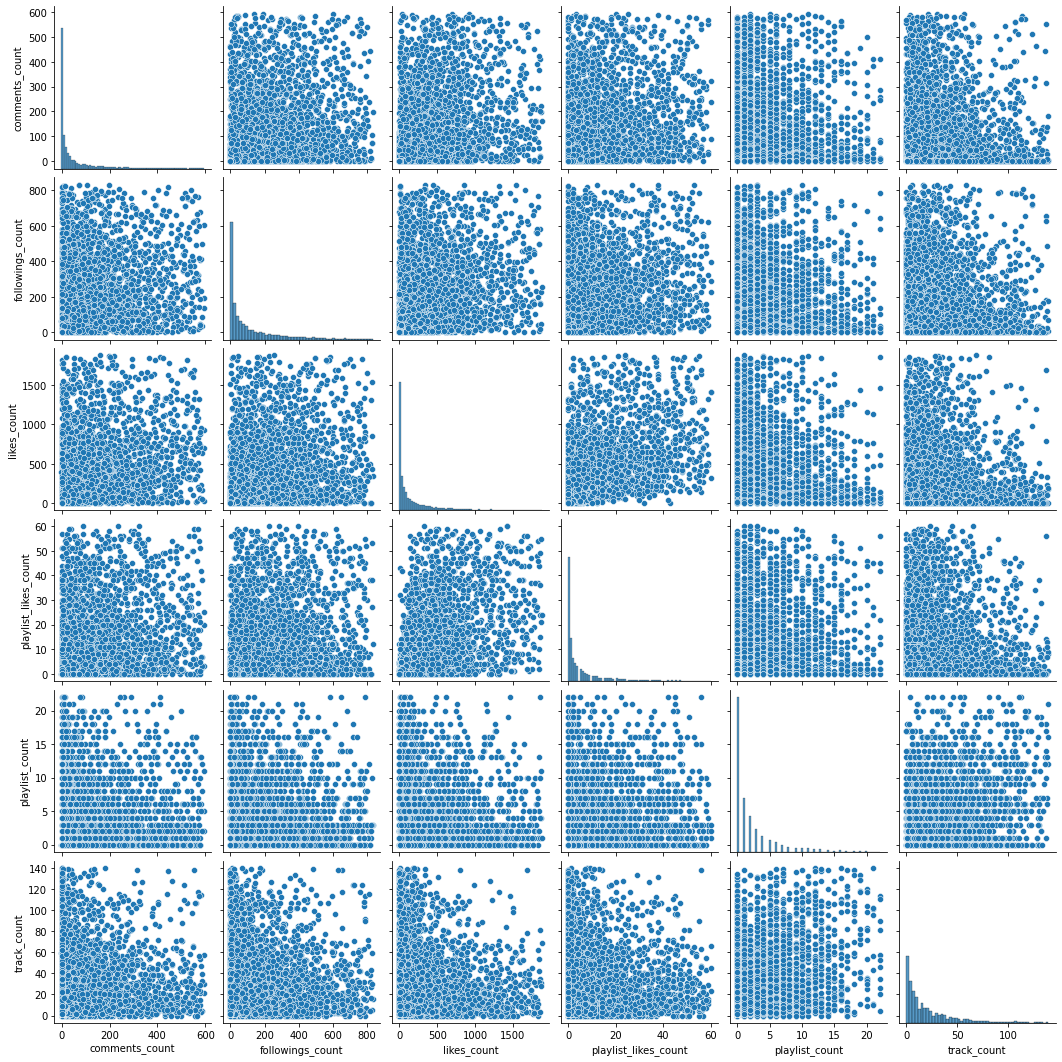

In [71]:
sns.pairplot(df_without_outlier[list_count_cols])

# 9. Top 10 nghệ sĩ có nhiều playlist nhất
- Tập dữ liệu sử dụng: `user`
- Trường cần sử dụng: `playlist_count`
- Kiểu dữ liệu mong đợi ở các trường: 
   - `playlist_count`: numerical 
- Vấn đề đặt ra: nghệ sĩ nào có nhiều playlist nhất
- Hướng giải quyết: Sử dụng **Bar chart** để trực quan hoá **10** user có nhiều playlist nhất. 
- Dự đoán kết quả: Số lượng playlist của những người này ở khoảng 2000-3000 và không chênh nhau quá nhiều. 

## Tiền xử lý dữ liệu
Với câu hỏi trên, chúng ta sẽ tập trung xử lý: Tập dữ liệu `user` với trường `playlist_count`
Đầu tiên ta xem tập dữ liệu user sau khi sort lại số lượng playlist từ lớn đến bé. 

In [72]:
# Load dataset
df = pd.read_csv("./user.csv")

# Sort theo số lượng playlist
# rồi xem phần đầu
df.sort_values('playlist_count', ascending=False).head(10)

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
5695,https://i1.sndcdn.com/avatars-000333045488-7fj...,CLUB.NL Pheromone Nights & KIWILAN,28534,NL,2010-09-27T12:03:30Z,3258,1995,Arthur,1787682,2021-02-16T17:07:03Z,Detour A 2 D 2,20052,4728,https://soundcloud.com/artoo-detoo,19134,24,Arthur Detour NL Official,False
11310,https://i1.sndcdn.com/avatars-tygldql6gZe0Nkc8...,Ibiza,28006,ES,2012-12-26T16:26:05Z,11752,1982,NEWS,31287491,2021-11-01T22:16:08Z,PORTAL,21032,4557,https://soundcloud.com/planetibiza,2904,796,PLANET IBIZA,False
11388,https://i1.sndcdn.com/avatars-fUQTi010mJY0bz5B...,Helsinki,1354,FI,2017-05-02T18:57:56Z,29038,800,Record,304954708,2021-10-27T16:07:24Z,Label,1550,1868,https://soundcloud.com/ayyofree,1959,516,AY YO TRIP!,True
12006,https://i1.sndcdn.com/avatars-000676912385-tyd...,NaN,0,NaN,2013-11-20T18:34:23Z,1382,2,NaN,67274528,2021-11-03T15:58:44Z,NaN,0,0,https://soundcloud.com/the-gary-sharp-show,1649,19332,The Gary Sharp Show,False
12007,https://i1.sndcdn.com/avatars-000142060183-ti1...,"Omaha, NE",0,US,2015-04-14T19:36:32Z,1627,4,NaN,148158448,2021-11-03T19:13:47Z,NaN,9,1,https://soundcloud.com/unsportsmanlike-conduct-1,1610,23274,Unsportsmanlike Conduct,False
11885,https://i1.sndcdn.com/avatars-VgPABl5zon8SMmuv...,Amsterdam,1,NL,2013-09-17T12:19:17Z,290744,5,A State Of Trance,58502729,2021-10-18T09:41:06Z,NaN,195,1,https://soundcloud.com/astateoftrance,1533,927,A State Of Trance,True
5881,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295381,103,Armada,28884239,2021-11-01T10:28:35Z,Music,16,0,https://soundcloud.com/armadamusic,1525,2233,Armada Music,True
10086,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295322,103,Armada,28884239,2021-10-11T13:15:15Z,Music,16,0,https://soundcloud.com/armadamusic,1523,2232,Armada Music,True
680,https://i1.sndcdn.com/avatars-77V2bju9gpDRVz8u...,NaN,1,NaN,2018-09-18T14:10:02Z,106,2000,Abele,510722982,2021-03-10T11:18:12Z,Vandrier,1783,1584,https://soundcloud.com/abele-vandrier,1501,0,Abele Vandrier,False
10288,https://i1.sndcdn.com/avatars-XF8ggizJPkREuPln...,NaN,1803,NaN,2013-10-29T15:58:59Z,73498,1764,RECORD LABEL & LABEL PARTY,64160816,2021-10-22T18:17:48Z,NaN,4487,3327,https://soundcloud.com/gmafiarecords,1389,1468,G-MAFIA RECORDS,True


Qua đó ta thấy có các dòng dữ bị trùng username, điều này xảy ra do merge 2 dataset khác nhau lại. Hãy xem bao nhiêu dòng bị trùng qua đoạn code dưới

In [73]:
len(df) - len(set(df['username']))

225

Vì vậy để xử lý 223 dòng trùng dữ liệu này, ta sẽ bỏ bớt 1 dòng, độ chênh lệch giữa 2 dòng không quá cao nên ta loại bỏ dòng nào cũng được.

In [74]:
# Loại bỏ các dòng trùng username
df = df.drop_duplicates(subset='username', keep="last")

df.sort_values('playlist_count', ascending=False).head(10)

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified
5695,https://i1.sndcdn.com/avatars-000333045488-7fj...,CLUB.NL Pheromone Nights & KIWILAN,28534,NL,2010-09-27T12:03:30Z,3258,1995,Arthur,1787682,2021-02-16T17:07:03Z,Detour A 2 D 2,20052,4728,https://soundcloud.com/artoo-detoo,19134,24,Arthur Detour NL Official,False
11310,https://i1.sndcdn.com/avatars-tygldql6gZe0Nkc8...,Ibiza,28006,ES,2012-12-26T16:26:05Z,11752,1982,NEWS,31287491,2021-11-01T22:16:08Z,PORTAL,21032,4557,https://soundcloud.com/planetibiza,2904,796,PLANET IBIZA,False
11388,https://i1.sndcdn.com/avatars-fUQTi010mJY0bz5B...,Helsinki,1354,FI,2017-05-02T18:57:56Z,29038,800,Record,304954708,2021-10-27T16:07:24Z,Label,1550,1868,https://soundcloud.com/ayyofree,1959,516,AY YO TRIP!,True
12006,https://i1.sndcdn.com/avatars-000676912385-tyd...,NaN,0,NaN,2013-11-20T18:34:23Z,1382,2,NaN,67274528,2021-11-03T15:58:44Z,NaN,0,0,https://soundcloud.com/the-gary-sharp-show,1649,19332,The Gary Sharp Show,False
12007,https://i1.sndcdn.com/avatars-000142060183-ti1...,"Omaha, NE",0,US,2015-04-14T19:36:32Z,1627,4,NaN,148158448,2021-11-03T19:13:47Z,NaN,9,1,https://soundcloud.com/unsportsmanlike-conduct-1,1610,23274,Unsportsmanlike Conduct,False
11885,https://i1.sndcdn.com/avatars-VgPABl5zon8SMmuv...,Amsterdam,1,NL,2013-09-17T12:19:17Z,290744,5,A State Of Trance,58502729,2021-10-18T09:41:06Z,NaN,195,1,https://soundcloud.com/astateoftrance,1533,927,A State Of Trance,True
10086,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295322,103,Armada,28884239,2021-10-11T13:15:15Z,Music,16,0,https://soundcloud.com/armadamusic,1523,2232,Armada Music,True
680,https://i1.sndcdn.com/avatars-77V2bju9gpDRVz8u...,NaN,1,NaN,2018-09-18T14:10:02Z,106,2000,Abele,510722982,2021-03-10T11:18:12Z,Vandrier,1783,1584,https://soundcloud.com/abele-vandrier,1501,0,Abele Vandrier,False
10288,https://i1.sndcdn.com/avatars-XF8ggizJPkREuPln...,NaN,1803,NaN,2013-10-29T15:58:59Z,73498,1764,RECORD LABEL & LABEL PARTY,64160816,2021-10-22T18:17:48Z,NaN,4487,3327,https://soundcloud.com/gmafiarecords,1389,1468,G-MAFIA RECORDS,True
11006,https://i1.sndcdn.com/avatars-000082594462-4lh...,New York,0,US,2013-03-21T17:27:01Z,40362,2,The Howard Stern,39782961,2020-11-22T13:29:55Z,Show,5,0,https://soundcloud.com/howardstern,1064,4610,Howard Stern,True


## Phân tích dữ liệu

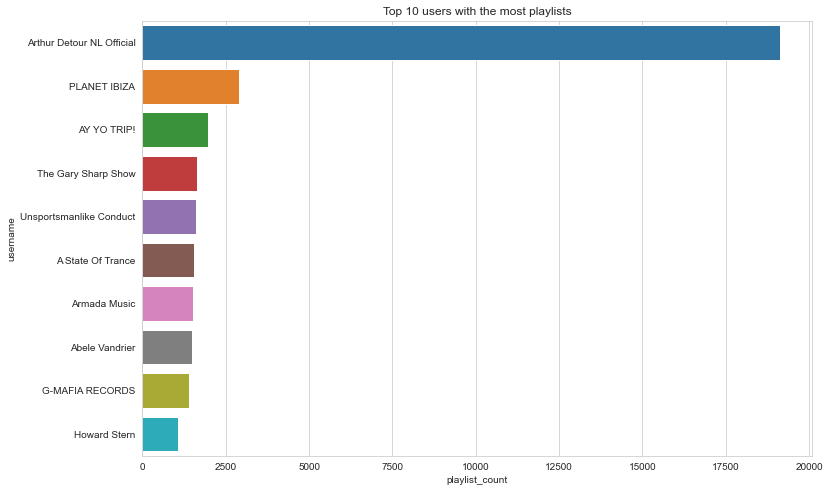

In [80]:
# Sort the dataset by playlist_count in  descending order
# then take the first 10 rows
top10_num_playlist = df.sort_values('playlist_count', ascending=False).head(10)

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots(figsize=(12, 8))


# Horizontal bar chart
# bar color represents for that country's region
sns.barplot(x='playlist_count', y='username',
            data=top10_num_playlist,
             dodge=False,)

plt.title('Top 10 users with the most playlists') # Chart title
# plt.ticklabel_format(style='plain', axis='x') # Change format of ticks on y axis

# Show the chart
plt.show()

# Save the image
# bbox_inches = 'tight': prevent the plot being cropped
fig.savefig("top_10_user_most_playlist.png", bbox_inches = 'tight')

## Nhận xét
User có nhiều playlist nhất vượt hẳn các user còn lại (gần như gấp gần 4 lần user thứ 2). Nếu xem vào cột ngày tạo tài khoản thì user này cũng được tạo cũng từ rất sớm từ năm 2010.

In [76]:
top10_num_playlist[['username', 'created_at']]

,username,created_at
5695,Arthur Detour NL Official,2010-09-27T12:03:30Z
11310,PLANET IBIZA,2012-12-26T16:26:05Z
11388,AY YO TRIP!,2017-05-02T18:57:56Z
12006,The Gary Sharp Show,2013-11-20T18:34:23Z
12007,Unsportsmanlike Conduct,2015-04-14T19:36:32Z
11885,A State Of Trance,2013-09-17T12:19:17Z
10086,Armada Music,2012-11-22T20:33:02Z
680,Abele Vandrier,2018-09-18T14:10:02Z
10288,G-MAFIA RECORDS,2013-10-29T15:58:59Z
11006,Howard Stern,2013-03-21T17:27:01Z


Nhưng nếu nhìn vào số bài hát user này có thì lại rất ít, chỉ có 24 bài hát.

In [77]:
top1_num_playlist = top10_num_playlist[top10_num_playlist['username'] == 'Arthur Detour NL Official']
top1_num_playlist[['username', 'playlist_count', 'track_count']]

,username,playlist_count,track_count
5695,Arthur Detour NL Official,19134,24


### Khám phá user dị thường này
Nhưng khi ta vào trang Soundcloud của người dùng này và vào mục playlist, điều thú vị là mỗi playlist của user này chỉ có duy nhất một track. Và nếu đối chiếu kỹ hơn các track user này có thì nhiều track trong playlist này bị lặp lại và cũng nhiều track chỉ tìm thấy trong phần playlist của user.

![User with highest number of playlists](img1.jpg)

Ngoài ra thêm một chi tiết thú vị là khi thu thập dữ liệu, khi duyệt đến user này, vòng lặp dùng để thu thập dữ liệu các playlist của user này lặp vô tận khi số lượng thu thập đã vượt hơn 19134 (bình thường khi thu thập đủ số lượng playlist của một user, vòng lặp sẽ tự động chuyển sang user khác). Và khi ta xem xét các playlist vượt con số 19134 này thì từ playlist 19135 trở đi, toàn bộ playlist đều rỗng không chứa track, phải chăng đây là bot do Soundcloud cài vào để ngăn chặn việc crawl? Nhưng nếu xem xét kỹ thì user này có follow người khác và người khác cũng follow user này, thậm chí là comment và tương tác lẫn nhau nên có vẻ user này không phải là bot.